# Classification of driving behavior using acc. data

This notebooks uses the driving behavior dataset from Kaggle and aims to classify the driver's driving based on accelerometer data.

## Libraries

In [1]:
from matplotlib import pyplot as plt


import pandas as pd
import numpy as np

## Preprocessing

In [2]:
# loading data
df = pd.read_csv('datasets/train_motion_data.csv')

df.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [3]:
# showing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [4]:
# basic statistics
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


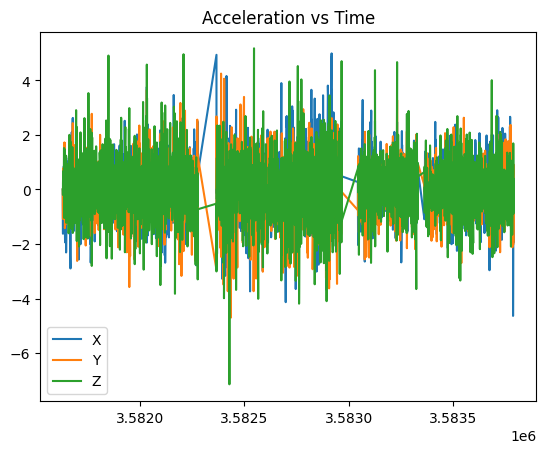

In [5]:
# Acceleration vs Time
plt.plot(df['Timestamp'], df['AccX'])
plt.plot(df['Timestamp'], df['AccY'])
plt.plot(df['Timestamp'], df['AccZ'])

plt.legend(['X', 'Y', 'Z'])
plt.title('Acceleration vs Time')
plt.show()

The dataset is clean with no null values. Becuase we are working with time-dependent physiscal measurements, we will not be removing the outliers as they carry important information regarding the driving at that moment in time.

From the plot, we can identify 4 distinct measurements and will analyse them separately.

We will divide the dataset into its 4 independent time frames

In [7]:
# verifying time stops
(df[['Timestamp']].diff() > 1).sum()

Timestamp    3
dtype: int64

Three time stops indicate 4 time slots

In [26]:
# get indeces for time windows
time_index = df[(df[['Timestamp']].diff() > 1)['Timestamp']].index
time_index

Index([1200, 2313, 2849], dtype='int64')

In [27]:
# create new dfs
df_1 = df.iloc[0:time_index[0], :]
df_1.tail()

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
1195,2.755200,-0.820672,2.556599,-0.617599,NORMAL,-0.031612,-0.865596,-0.962189,3582274
1196,1.318118,-0.016871,1.171574,0.603792,NORMAL,0.253662,0.692110,0.537485,3582275
1197,2.717300,2.488864,-1.001262,0.432143,NORMAL,0.140041,-0.080023,0.051847,3582275
1198,3.368310,-0.680338,-0.048300,-3.298533,NORMAL,-0.169057,-0.383012,0.217392,3582276
1199,1.540797,0.563353,1.234707,-0.729512,NORMAL,0.226784,-1.290758,-0.309174,3582276


In [28]:
# create new dfs
df_2 = df.iloc[time_index[0]:time_index[1], :]
df_2.tail()

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
2308,1.872663,0.538870,-1.645984,-0.712197,AGGRESSIVE,0.349568,0.028100,0.662712,3582964
2309,2.232414,1.678918,-1.392127,-0.476326,AGGRESSIVE,0.570090,-0.061697,-0.168675,3582965
2310,2.052976,0.323433,0.589311,-1.939797,AGGRESSIVE,-0.027947,1.255328,0.639500,3582965
2311,5.356814,2.497311,-0.606175,4.700154,AGGRESSIVE,0.849255,-0.196699,-0.240757,3582966
2312,1.264735,0.482297,-0.090277,-1.165673,AGGRESSIVE,-0.558178,-0.242514,-0.383700,3582966


In [29]:
# create new dfs
df_3 = df.iloc[time_index[1]:time_index[2], :]
df_3.head()

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
2313,1.110570,0.268914,-0.761465,0.762380,SLOW,-0.041386,0.158825,-0.331776,3583044
2314,2.519490,-2.038684,1.218967,0.840069,SLOW,0.028253,0.028100,0.115377,3583045
2315,0.155349,-0.034550,-0.109122,-0.105034,SLOW,0.059407,0.006109,0.196622,3583045
2316,0.547172,-0.322625,-0.346236,0.274647,SLOW,0.080176,-0.013439,0.335900,3583046
2317,0.640547,0.344335,-0.129027,0.524487,SLOW,0.045968,-0.039706,0.348117,3583046


In [30]:
# create new dfs
df_4 = df.iloc[time_index[2]:, :]
df_4.tail()

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
3639,2.785035,0.915688,-2.017489,1.687505,SLOW,0.450360,0.384845,-1.236468,3583789
3640,2.141833,-1.934203,0.914925,-0.096013,SLOW,0.321468,0.649350,-0.477162,3583790
3641,1.181378,-0.222845,0.747304,-0.887430,SLOW,0.361174,-0.406836,0.054291,3583790
3642,0.531175,-0.349423,0.067261,0.394368,SLOW,-0.132405,0.020159,-0.004963,3583791
3643,0.711265,-0.402428,0.406218,-0.423009,SLOW,-0.053603,-0.006720,0.001145,3583791


In [11]:
# jerk norm


In [12]:
# jerk XYZ

In [13]:
# velocity XYZ

In [14]:
# speed

## Enriching dataset

We will calculate more physical parameters from the available data such as: acceleration norm, jerk, velocity, etc.

In [33]:
# acceleration norm
dfs = [df_1, df_2, df_3, df_4]

for dataframe in dfs:
    dataframe.loc[:,'Acc'] = np.sqrt(dataframe.loc[:,'AccX']**2 + dataframe.loc[:,'AccY']**2 + dataframe.loc[:,'AccZ']**2)
    dataframe = dataframe.reindex(sorted(df.columns), axis=1)
    display(dataframe.head())

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
0,0.000000,0.000000,0.000000,0.000000,NORMAL,0.059407,-0.174707,0.101938,3581629
1,1.963075,-1.624864,-1.082492,-0.204183,NORMAL,-0.028558,0.051313,0.135536,3581630
2,0.645930,-0.594660,-0.122410,0.220502,NORMAL,-0.019395,-0.029322,0.087888,3581630
3,1.021474,0.738478,-0.228456,0.667732,NORMAL,0.069791,-0.029932,0.054902,3581631
4,0.787030,0.101741,0.777568,-0.066730,NORMAL,0.030696,-0.003665,0.054902,3581631


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
1200,5.769525,4.933154,-2.946080,-0.521562,AGGRESSIVE,0.226784,-1.290758,-0.309174,3582366
1201,4.684262,2.397097,2.675064,-3.006705,AGGRESSIVE,0.014203,0.009163,0.054902,3582366
1202,0.199308,-0.147440,0.042525,0.127188,AGGRESSIVE,0.017257,-0.003054,0.075060,3582367
1203,0.638895,0.086913,0.360096,0.520542,AGGRESSIVE,0.066737,-0.007941,0.166079,3582367
1204,1.928528,-1.122270,1.058838,1.156976,AGGRESSIVE,0.088728,0.000000,0.381714,3582368


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
2313,1.110570,0.268914,-0.761465,0.762380,SLOW,-0.041386,0.158825,-0.331776,3583044
2314,2.519490,-2.038684,1.218967,0.840069,SLOW,0.028253,0.028100,0.115377,3583045
2315,0.155349,-0.034550,-0.109122,-0.105034,SLOW,0.059407,0.006109,0.196622,3583045
2316,0.547172,-0.322625,-0.346236,0.274647,SLOW,0.080176,-0.013439,0.335900,3583046
2317,0.640547,0.344335,-0.129027,0.524487,SLOW,0.045968,-0.039706,0.348117,3583046


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp
2849,1.274451,-1.094320,0.140263,0.637978,SLOW,-0.062766,-0.034819,0.001756,3583363
2850,1.314181,-0.989751,0.602899,0.619659,SLOW,-0.049327,-0.091019,-0.042837,3583363
2851,1.134747,0.131062,0.757418,0.834740,SLOW,0.033139,0.136834,0.015806,3583364
2852,0.984334,0.484404,0.070784,-0.853965,SLOW,-0.025504,-0.052534,-0.028176,3583364
2853,0.795222,-0.100893,0.003070,-0.788790,SLOW,0.029474,0.014050,0.001756,3583365


In [38]:
# jerk
for dataframe in dfs:
    jerkx = np.gradient(dataframe.loc[:,'AccX'])
    jerky = np.gradient(dataframe.loc[:,'AccY'])
    jerkz = np.gradient(dataframe.loc[:,'AccZ'])
    dataframe.loc[:,'JerkX'] = jerkx
    dataframe.loc[:,'JerkY'] = jerky
    dataframe.loc[:,'JerkZ'] = jerkz
    dataframe.loc[:,'Jerk'] = np.sqrt(dataframe.loc[:,'JerkX']**2 + dataframe.loc[:,'JerkY']**2 + dataframe.loc[:,'JerkZ']**2)
    dataframe = dataframe.reindex(sorted(dataframe.columns), axis=1)
    display(dataframe.head())

,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
0,0.000000,0.000000,0.000000,0.000000,NORMAL,0.059407,-0.174707,0.101938,1.963075,-1.624864,-1.082492,-0.204183,3581629
1,1.963075,-1.624864,-1.082492,-0.204183,NORMAL,-0.028558,0.051313,0.135536,0.322965,-0.297330,-0.061205,0.110251,3581630
2,0.645930,-0.594660,-0.122410,0.220502,NORMAL,-0.019395,-0.029322,0.087888,1.329944,1.181671,0.427018,0.435957,3581630
3,1.021474,0.738478,-0.228456,0.667732,NORMAL,0.069791,-0.029932,0.054902,0.586821,0.348200,0.449989,-0.143616,3581631
4,0.787030,0.101741,0.777568,-0.066730,NORMAL,0.030696,-0.003665,0.054902,0.437011,-0.290004,0.287173,-0.156229,3581631


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
1200,5.769525,4.933154,-2.946080,-0.521562,AGGRESSIVE,0.226784,-1.290758,-0.309174,6.648667,-2.536057,5.621143,-2.485143,3582366
1201,4.684262,2.397097,2.675064,-3.006705,AGGRESSIVE,0.014203,0.009163,0.054902,2.965007,-2.540297,1.494302,0.324375,3582366
1202,0.199308,-0.147440,0.042525,0.127188,AGGRESSIVE,0.017257,-0.003054,0.075060,2.405072,-1.155092,-1.157484,1.763623,3582367
1203,0.638895,0.086913,0.360096,0.520542,AGGRESSIVE,0.066737,-0.007941,0.166079,0.872303,-0.487415,0.508156,0.514894,3582367
1204,1.928528,-1.122270,1.058838,1.156976,AGGRESSIVE,0.088728,0.000000,0.381714,1.491197,-1.216453,0.742529,-0.438816,3582368


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
2313,1.110570,0.268914,-0.761465,0.762380,SLOW,-0.041386,0.158825,-0.331776,3.041900,-2.307598,1.980431,0.077689,3583044
2314,2.519490,-2.038684,1.218967,0.840069,SLOW,0.028253,0.028100,0.115377,0.563482,-0.151732,0.326172,-0.433707,3583045
2315,0.155349,-0.034550,-0.109122,-0.105034,SLOW,0.059407,0.006109,0.196622,1.195242,0.858029,-0.782601,-0.282711,3583045
2316,0.547172,-0.322625,-0.346236,0.274647,SLOW,0.080176,-0.013439,0.335900,0.367507,0.189442,-0.009953,0.314760,3583046
2317,0.640547,0.344335,-0.129027,0.524487,SLOW,0.045968,-0.039706,0.348117,0.378808,-0.187044,-0.304901,0.124682,3583046


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Jerk,JerkX,JerkY,JerkZ,Timestamp
2849,1.274451,-1.094320,0.140263,0.637978,SLOW,-0.062766,-0.034819,0.001756,0.474661,0.104569,0.462636,-0.018318,3583363
2850,1.314181,-0.989751,0.602899,0.619659,SLOW,-0.049327,-0.091019,-0.042837,0.693029,0.612691,0.308578,0.098381,3583363
2851,1.134747,0.131062,0.757418,0.834740,SLOW,0.033139,0.136834,0.015806,1.075621,0.737077,-0.266057,-0.736812,3583364
2852,0.984334,0.484404,0.070784,-0.853965,SLOW,-0.025504,-0.052534,-0.028176,0.902593,-0.115977,-0.377174,-0.811765,3583364
2853,0.795222,-0.100893,0.003070,-0.788790,SLOW,0.029474,0.014050,0.001756,0.508711,-0.167275,-0.118701,0.465528,3583365


,Acc,AccX,AccY,AccZ,Class,GyroX,GyroY,GyroZ,Timestamp,JerkX,JerkY,JerkZ,Jerk
0,0.000000,0.000000,0.000000,0.000000,NORMAL,0.059407,-0.174707,0.101938,3581629,-1.624864,-1.082492,-0.204183,1.963075
1,1.963075,-1.624864,-1.082492,-0.204183,NORMAL,-0.028558,0.051313,0.135536,3581630,-0.297330,-0.061205,0.110251,0.322965
2,0.645930,-0.594660,-0.122410,0.220502,NORMAL,-0.019395,-0.029322,0.087888,3581630,1.181671,0.427018,0.435957,1.329944
3,1.021474,0.738478,-0.228456,0.667732,NORMAL,0.069791,-0.029932,0.054902,3581631,0.348200,0.449989,-0.143616,0.586821
4,0.787030,0.101741,0.777568,-0.066730,NORMAL,0.030696,-0.003665,0.054902,3581631,-0.290004,0.287173,-0.156229,0.437011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2.755200,-0.820672,2.556599,-0.617599,NORMAL,-0.031612,-0.865596,-0.962189,3582274,-0.722411,-0.407216,0.121912,0.838192
1196,1.318118,-0.016871,1.171574,0.603792,NORMAL,0.253662,0.692110,0.537485,3582275,1.654768,-1.778931,0.524871,2.485627
1197,2.717300,2.488864,-1.001262,0.432143,NORMAL,0.140041,-0.080023,0.051847,3582275,-0.331734,-0.609937,-1.951163,2.071016
1198,3.368310,-0.680338,-0.048300,-3.298533,NORMAL,-0.169057,-0.383012,0.217392,3582276,-0.962756,1.117984,-0.580828,1.585607
